In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import glob
import cv2
import imblearn

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_normal = glob.glob('/kaggle/input/pneumonia-chest-x-ray-dataset/train/normal/*.jpeg')
train_pneumonia = glob.glob('/kaggle/input/pneumonia-chest-x-ray-dataset/train/pneumonia/*.jpeg')

In [3]:
len(train_normal) , len(train_pneumonia)

(1341, 3875)

In [4]:
print(len(train_normal)/(len(train_normal)+ len(train_pneumonia)),
      len(train_pneumonia)/(len(train_normal)+ len(train_pneumonia)))

0.2570935582822086 0.7429064417177914


In [5]:
import pathlib

data_dir = pathlib.Path('/kaggle/input/pneumonia-chest-x-ray-dataset/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['normal' 'pneumonia']


In [6]:
#visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
    #target directorty
    target_folder = target_dir + target_class
    
    #random image
    random_image = random.sample(os.listdir(target_folder) , 1)
    print(random_image)
    
    #visualize image
    img = cv2.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    
    print(f'image shape: {img.shape}')  #show shape of image
    
    return img


['person366_virus_746.jpeg']
image shape: (904, 1280, 3)


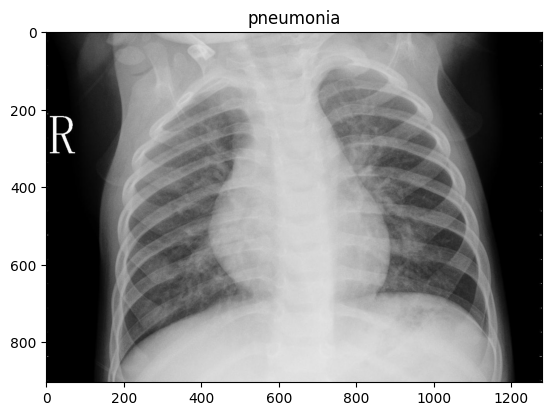

In [7]:
img = view_random_image(
                       target_dir = '/kaggle/input/pneumonia-chest-x-ray-dataset/train/',
                       target_class = 'pneumonia')

['NORMAL2-IM-1245-0001.jpeg']
image shape: (1402, 1422, 3)
['IM-0195-0001.jpeg']
image shape: (1546, 1774, 3)
['NORMAL2-IM-1131-0001.jpeg']
image shape: (1353, 1716, 3)
['NORMAL2-IM-1039-0001.jpeg']
image shape: (1090, 1384, 3)
['NORMAL2-IM-1094-0001.jpeg']
image shape: (1256, 1522, 3)


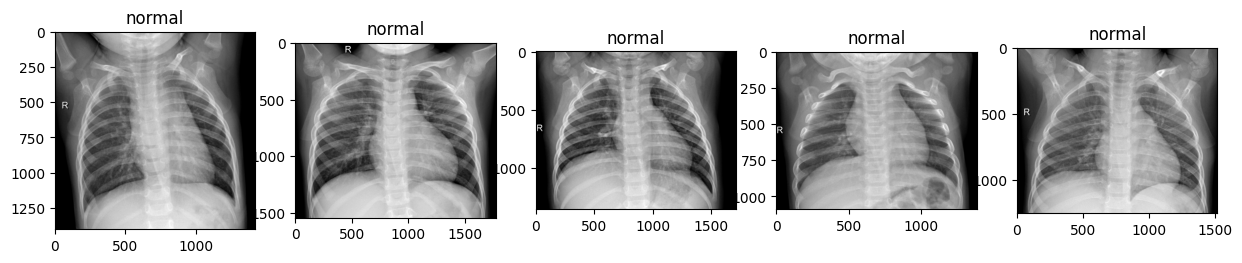

In [8]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = view_random_image(
                       target_dir = '/kaggle/input/pneumonia-chest-x-ray-dataset/train/',
                       target_class = 'normal')
    
    

plt.show();

['person1803_bacteria_4652.jpeg']
image shape: (672, 976, 3)
['person583_bacteria_2409.jpeg']
image shape: (928, 1328, 3)
['person1905_bacteria_4801.jpeg']
image shape: (1192, 1512, 3)
['person547_bacteria_2296.jpeg']
image shape: (475, 856, 3)
['person1483_bacteria_3876.jpeg']
image shape: (616, 984, 3)


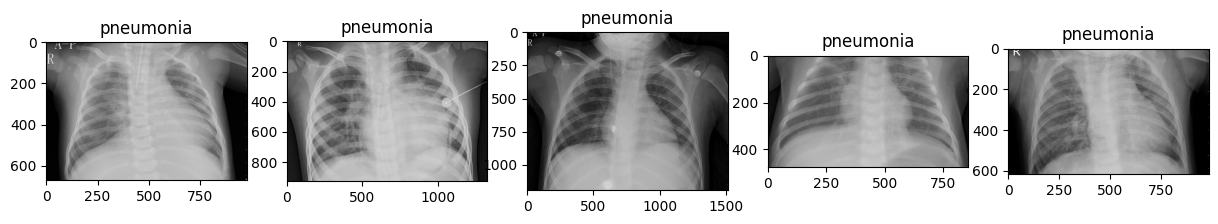

In [9]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = view_random_image(
                       target_dir = '/kaggle/input/pneumonia-chest-x-ray-dataset/train/',
                       target_class = 'pneumonia')
    
    

plt.show();

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
tf.random.set_seed(40)

#preprocessing
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

#path to directories
train_dir = '/kaggle/input/pneumonia-chest-x-ray-dataset/train'
val_dir = '/kaggle/input/pneumonia-chest-x-ray-dataset/val'

#importing data and turn into batches
train_data = train_datagen.flow_from_directory(train_dir , batch_size = 16 , target_size = (224,224) , class_mode = 'binary' , seed = 40)
val_data = val_datagen.flow_from_directory(val_dir , batch_size = 16 , target_size = (224,224) , class_mode = 'binary' , seed = 40)



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [12]:
#model building - tiny vgg architecture on raw data

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( filters = 10,
                          kernel_size = 3,
                          activation = 'relu',
                          input_shape = (224,224 ,3)),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3 , activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3 , activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
    
])

#compile
model_1.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])


In [13]:
len(train_data)

326

In [14]:
tf.random.set_seed(40)
history_1 = model_1.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = val_data,
           validation_steps = len(val_data))

Epoch 1/5
326/326 [==============================] - 90s 241ms/step - loss: 0.2142 - accuracy: 0.9135 - val_loss: 0.2105 - val_accuracy: 0.8750
Epoch 2/5
326/326 [==============================] - 47s 145ms/step - loss: 0.1078 - accuracy: 0.9620 - val_loss: 0.4907 - val_accuracy: 0.7500
Epoch 3/5
326/326 [==============================] - 47s 144ms/step - loss: 0.0742 - accuracy: 0.9730 - val_loss: 0.2318 - val_accuracy: 0.8750
Epoch 4/5
326/326 [==============================] - 47s 145ms/step - loss: 0.0757 - accuracy: 0.9739 - val_loss: 0.0717 - val_accuracy: 1.0000
Epoch 5/5
326/326 [==============================] - 47s 144ms/step - loss: 0.0537 - accuracy: 0.9774 - val_loss: 0.4456 - val_accuracy: 0.6875


the 75% express the inability to classify normal cases resulted from poor representation in train_set

Text(0.5, 1.0, 'accuracy')

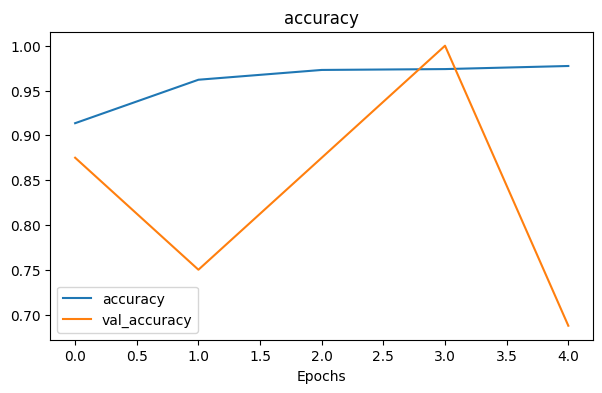

In [15]:
#visualize performance curves

plt.figure(figsize = (7,4))
accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy']
epochs = range(len(history_1.history['accuracy']))

plt.plot(epochs, accuracy , label = 'accuracy')
plt.plot(epochs, val_accuracy , label = 'val_accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title('accuracy')




In [16]:
#resolving undersampling of normal cases via adjusting class weights 
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes = np.unique(train_data.classes),
                                                 y = train_data.classes)

train_class_weights = dict(enumerate(class_weights))

In [17]:
#data augmentation

#creating new data generators
train_datagen_augmented = ImageDataGenerator( rescale = 1./255,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True
                                            )

#augmented data batches
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir , 
                                                                  target_size = (224,224),
                                                                   batch_size = 64,
                                                                   class_mode = 'binary',
                                                                  shuffle = True)



Found 5216 images belonging to 2 classes.


In [18]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes = np.unique(train_data_augmented.classes),
                                                 y = train_data_augmented.classes)

train_augmented_class_weights = dict(enumerate(class_weights))
train_augmented_class_weights

{0: 1.9448173005219984, 1: 0.6730322580645162}

Text(0.5, 1.0, 'augmented_image')

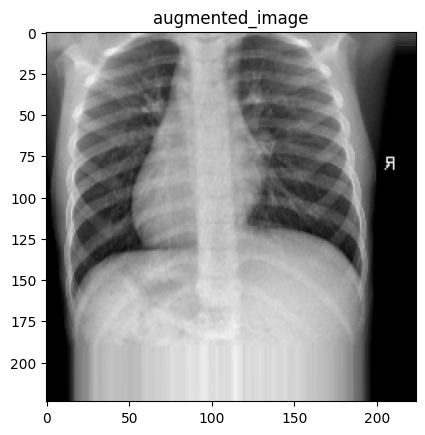

In [19]:
#sample augmented data

augmented_images , labels = train_data_augmented.next()
random_number = random.randint(0,32)
plt.imshow(augmented_images[random_number])
plt.title('augmented_image')

In [20]:
#model building ---> base_Model vgg on augmented images

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( filters = 10,
                          kernel_size = 3,
                          activation = 'relu',
                          input_shape = (224,224 ,3)),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3 , activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3 , activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
    
])

#compile
model_2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])


In [21]:
history_2 = model_2.fit(train_data_augmented,
           epochs = 10,
           steps_per_epoch = len(train_data_augmented),
           validation_data = val_data,
           validation_steps = len(val_data),
           class_weight = train_augmented_class_weights)

Epoch 1/10
82/82 [==============================] - 100s 1s/step - loss: 0.4976 - accuracy: 0.7442 - val_loss: 0.5940 - val_accuracy: 0.6250
Epoch 2/10
82/82 [==============================] - 99s 1s/step - loss: 0.3488 - accuracy: 0.8451 - val_loss: 0.4970 - val_accuracy: 0.6875
Epoch 3/10
82/82 [==============================] - 99s 1s/step - loss: 0.3068 - accuracy: 0.8698 - val_loss: 0.3265 - val_accuracy: 0.8750
Epoch 4/10
82/82 [==============================] - 98s 1s/step - loss: 0.2847 - accuracy: 0.8762 - val_loss: 0.4732 - val_accuracy: 0.7500
Epoch 5/10
82/82 [==============================] - 98s 1s/step - loss: 0.2536 - accuracy: 0.8947 - val_loss: 0.4192 - val_accuracy: 0.8125
Epoch 6/10
82/82 [==============================] - 99s 1s/step - loss: 0.2487 - accuracy: 0.8930 - val_loss: 0.3090 - val_accuracy: 0.8750
Epoch 7/10
82/82 [==============================] - 98s 1s/step - loss: 0.2405 - accuracy: 0.8984 - val_loss: 0.3103 - val_accuracy: 0.8125
Epoch 8/10
82/82 [=

poor learning weights for normal cases, with inability to emprove with epochs across treain and val

Text(0.5, 1.0, 'accuracy')

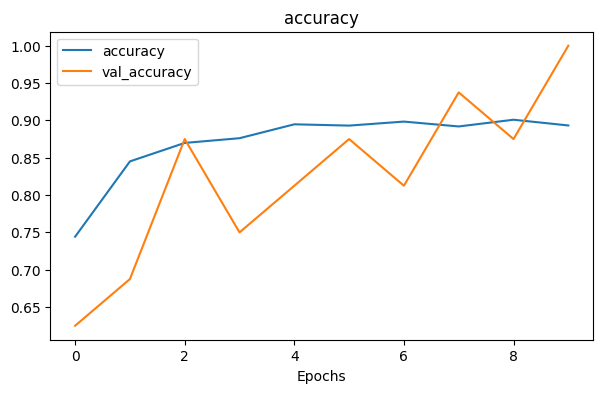

In [22]:
#visualize performance curves

plt.figure(figsize = (7,4))
accuracy = history_2.history['accuracy']
val_accuracy = history_2.history['val_accuracy']
epochs = range(len(history_2.history['accuracy']))

plt.plot(epochs, accuracy , label = 'accuracy')
plt.plot(epochs, val_accuracy , label = 'val_accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title('accuracy')




## obvious overfitting

In [23]:
#enhanced model_3

#model building ---> simpler layers

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( filters = 10,
                          kernel_size = 3,
                          activation = 'relu',
                          input_shape = (224,224 ,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3 , activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
    
])

#compile
model_3.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(lr = .0001),
               metrics = ['accuracy'])


In [24]:
history_3 = model_3.fit(train_data_augmented,
           epochs = 10,
           steps_per_epoch = len(train_data_augmented),
           validation_data = val_data,
           validation_steps = len(val_data),
            class_weight = train_augmented_class_weights)

Epoch 1/10
82/82 [==============================] - 100s 1s/step - loss: 0.6687 - accuracy: 0.6620 - val_loss: 0.5360 - val_accuracy: 0.6250
Epoch 2/10
82/82 [==============================] - 99s 1s/step - loss: 0.4307 - accuracy: 0.8085 - val_loss: 0.6858 - val_accuracy: 0.6875
Epoch 3/10
82/82 [==============================] - 99s 1s/step - loss: 0.3310 - accuracy: 0.8583 - val_loss: 1.1298 - val_accuracy: 0.6250
Epoch 4/10
82/82 [==============================] - 99s 1s/step - loss: 0.3343 - accuracy: 0.8530 - val_loss: 0.4895 - val_accuracy: 0.6875
Epoch 5/10
82/82 [==============================] - 98s 1s/step - loss: 0.2979 - accuracy: 0.8733 - val_loss: 0.5721 - val_accuracy: 0.7500
Epoch 6/10
82/82 [==============================] - 98s 1s/step - loss: 0.3228 - accuracy: 0.8622 - val_loss: 0.5690 - val_accuracy: 0.6875
Epoch 7/10
82/82 [==============================] - 98s 1s/step - loss: 0.3031 - accuracy: 0.8633 - val_loss: 0.3582 - val_accuracy: 0.7500
Epoch 8/10
82/82 [=

Text(0.5, 1.0, 'accuracy')

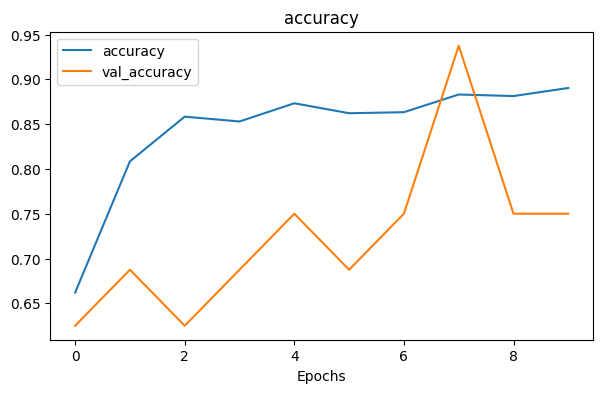

In [25]:
#visualize performance curves

plt.figure(figsize = (7,4))
accuracy = history_3.history['accuracy']
val_accuracy = history_3.history['val_accuracy']
epochs = range(len(history_3.history['accuracy']))

plt.plot(epochs, accuracy , label = 'accuracy')
plt.plot(epochs, val_accuracy , label = 'val_accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title('accuracy')




In [26]:
#import and resize helper function for img preprocessing

def load_and_prep_image(filename , img_shape = (224)):
    
    #read image
    img = tf.io.read_file(filename)
    #decode to tensor
    img = tf.image.decode_image(img , channels = 3)
    #resize
    img = tf.image.resize(img , size = [img_shape , img_shape])
    #scale
    img = img/255.
    #img = tf.expand_dims(img , axis = 0)
    
    return img

In [27]:
test_img = load_and_prep_image('/kaggle/input/pneumonia-chest-x-ray-dataset/test/normal/IM-0001-0001.jpeg')
test_img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.12268104, 0.12268104, 0.12268104],
        [0.12282038, 0.12282038, 0.12282038],
        [0.1254902 , 0.1254902 , 0.1254902 ],
        ...,
        [0.12428382, 0.12428382, 0.12428382],
        [0.11533837, 0.11533837, 0.11533837],
        [0.1358633 , 0.1358633 , 0.1358633 ]],

       [[0.12551644, 0.12551644, 0.12551644],
        [0.12690826, 0.12690826, 0.12690826],
        [0.11365756, 0.11365756, 0.11365756],
        ...,
        [0.11469501, 0.11469501, 0.11469501],
        [0.12790196, 0.12790196, 0.12790196],
        [0.12941177, 0.12941177, 0.12941177]],

       [[0.12393208, 0.12393208, 0.12393208],
        [0.12393208, 0.12393208, 0.12393208],
        [0.13202962, 0.13202962, 0.13202962],
        ...,
        [0.12156863, 0.12156863, 0.12156863],
        [0.1302171 , 0.1302171 , 0.1302171 ],
        [0.12156863, 0.12156863, 0.12156863]],

       ...,

       [[0.12662815, 0.12662815, 0.12662815],
        [0.11

In [28]:
#prediction helper

def pred_plot( model , filename , class_names = class_names):
    
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img , axis = 0))
    predict_class = class_names[int(tf.round(pred))]
    
    print('pred_class_propa = ', pred)
    plt.imshow(img)
    plt.title(f'prediction :{predict_class}')
    plt.axis(False);

1/1 [==============================] - 0s 165ms/step
pred_class_propa =  [[0.4974463]]


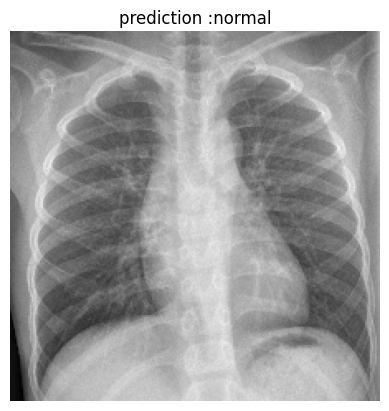

In [29]:
pred_plot(model_3 , '/kaggle/input/pneumonia-chest-x-ray-dataset/test/normal/IM-0006-0001.jpeg' , class_names = class_names )

In [30]:
import datetime

def create_tensorboard_callback(dir_name , experiment_name):
    
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime('%Y%m%d - %H%M%S')
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
    print(f"saving Tensorboard log files to : {log_dir}")
    
    return tensorboard_callback

In [31]:
efficient_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2"

In [32]:
# import dependencies
import tensorflow_hub as hub
from tensorflow.keras import layers

In [33]:
def create_model(model_url , num_classes = 2):
    
    feature_extraction_layer = hub.KerasLayer(model_url ,
                                        trainable = False,
                                       input_shape = (224,224 ,3))
    
    model = tf.keras.Sequential([
        feature_extraction_layer,
        layers.Dense(1 , activation = 'sigmoid' , name = 'output_layer')
    ])
    
    return model

In [34]:
eff_model = create_model(efficient_url , num_classes = 2)

In [35]:
eff_model.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

In [36]:
eff_history = eff_model.fit(train_data_augmented,
           epochs = 5,
           steps_per_epoch = len(train_data_augmented),
           validation_data = val_data,
           validation_steps = len(val_data),
            class_weight = train_augmented_class_weights,
            callbacks = [create_tensorboard_callback(dir_name = 'tensorflow_hub' , experiment_name = 'eff_v2')])

saving Tensorboard log files to : tensorflow_hub/eff_v2/20231023 - 112752
Epoch 1/5
82/82 [==============================] - 108s 1s/step - loss: 0.2417 - accuracy: 0.8907 - val_loss: 0.2131 - val_accuracy: 0.9375
Epoch 2/5
82/82 [==============================] - 99s 1s/step - loss: 0.1615 - accuracy: 0.9321 - val_loss: 0.1745 - val_accuracy: 1.0000
Epoch 3/5
82/82 [==============================] - 99s 1s/step - loss: 0.1297 - accuracy: 0.9431 - val_loss: 0.1446 - val_accuracy: 1.0000
Epoch 4/5
82/82 [==============================] - 99s 1s/step - loss: 0.1212 - accuracy: 0.9503 - val_loss: 0.1735 - val_accuracy: 0.9375
Epoch 5/5
82/82 [==============================] - 99s 1s/step - loss: 0.1145 - accuracy: 0.9530 - val_loss: 0.1256 - val_accuracy: 1.0000
